
#EDA + comparing regressions

---
It is important to know the group of patients that more spend your money in hospital, because the hospital can do price policy and know the most expensive patients (if they have the price cost).

In here, were go make an exploratory data analysis and to compare four regression models (Linear regression, polynomial regression, random forest regressor and decision three regressor) 


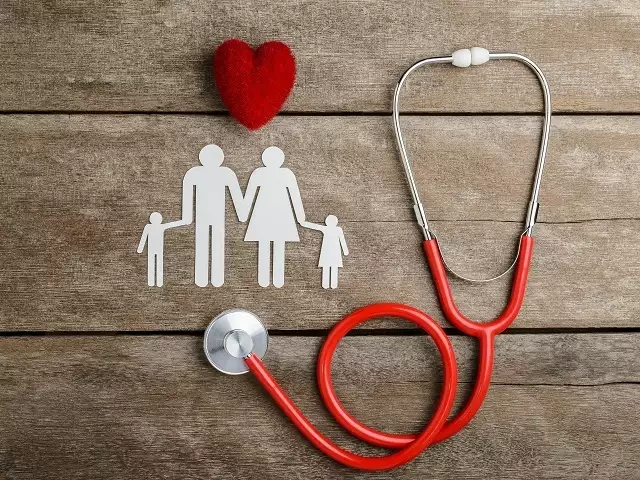

#About dataset

---

This dataset contains person's information like age, sex, gender, bmi,region, smoke or not and we have to predict their medical insurance cost.In this notebook I will apply four regression techniques predict the medical insurance costs.

#Let's code!!

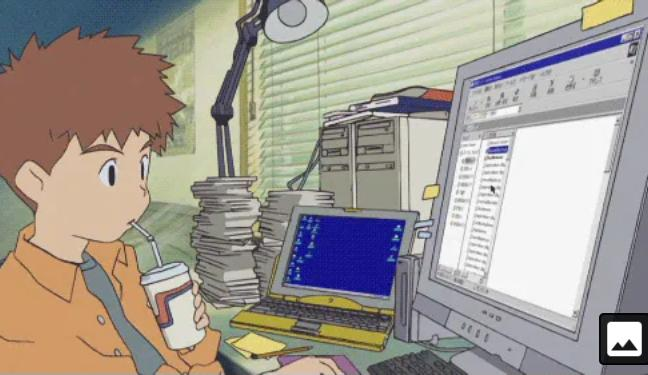

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.despine(left=True, bottom=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<Figure size 432x288 with 0 Axes>

In [2]:
cores_genero = ['#8181F7','#F781D8']
cores_fumante = ['#8FBC8F', '#008080']
paleta_genero = sns.color_palette(cores_genero)
paleta_fumante = sns.color_palette(cores_fumante)

In [3]:
df = pd.read_csv('cost_medical.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
def bmi_cat(i):
    if 18.5 > i:
      return 'underweith'
    elif 18.5 <= i <= 25:
      return 'normalweith'
    elif 25 < i <= 30:
      return 'overweith'
    elif i > 30:
      return 'obese'



df['obes'] = df['bmi'].apply(lambda i: bmi_cat(i))

I did this because there are differents 'bmi' in each 'obesity', so to dont occur a distortion, I preferred use both columns

In [7]:
def kids(x):
  if x > 0:
    return 'yes'
  else:
    return 'no'
  
df['kids'] = df['children'].apply(lambda x: kids(x))

Verify the NaN data

In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
obes        0
kids        0
dtype: int64

In [9]:
df.describe(include='O')

,sex,smoker,region,obes,kids
count,1338,1338,1338,1338,1338
unique,2,2,4,4,2
top,male,no,southeast,obese,yes
freq,676,1064,364,705,764


##Individual

---

Exploratory data analysis of each column

###Sex

In [10]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

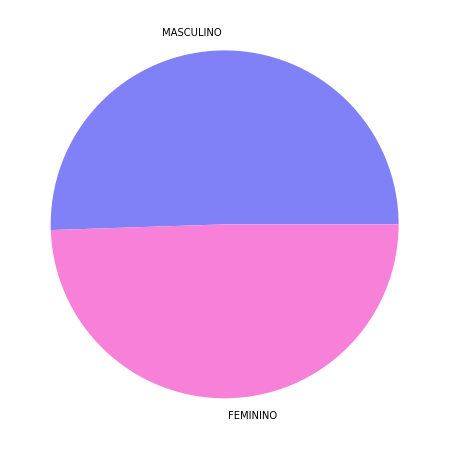

In [11]:
fig = plt.figure(figsize=(8,8))
plt.pie(df['sex'].value_counts(), labels=['MASCULINO', 'FEMININO'], colors=cores_genero);

###Age

In [12]:
print(f'Median:     {df.age.median()}')
print(f'{df.age.describe()}')

Median:     39.0
count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64


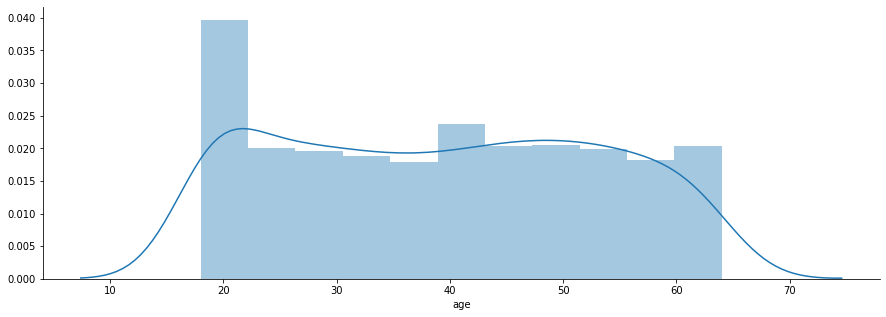

In [13]:
fig = plt.figure(figsize=(15,5))
sns.distplot(df['age'])
sns.despine()

###Smoker

In [14]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

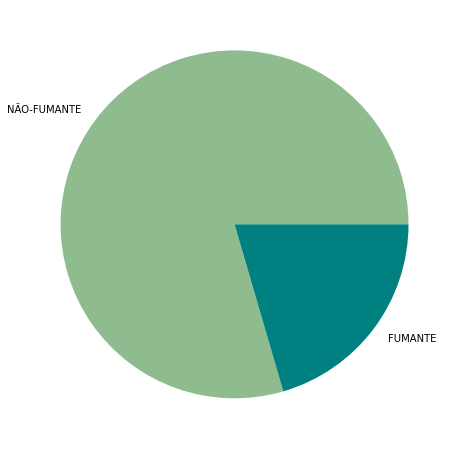

In [15]:
fig = plt.figure(figsize=(8,8))
plt.pie(df['smoker'].value_counts(), labels=['NÃO-FUMANTE', 'FUMANTE'], colors=cores_fumante);

###Children

In [16]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

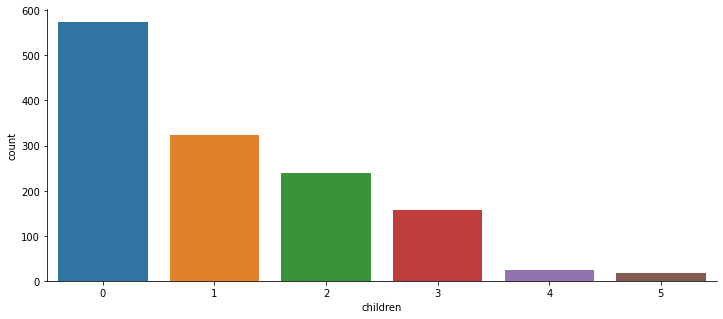

In [17]:
fig = plt.figure(figsize=(12,5))
sns.countplot(x='children',data=df)
sns.despine()

###Bmi

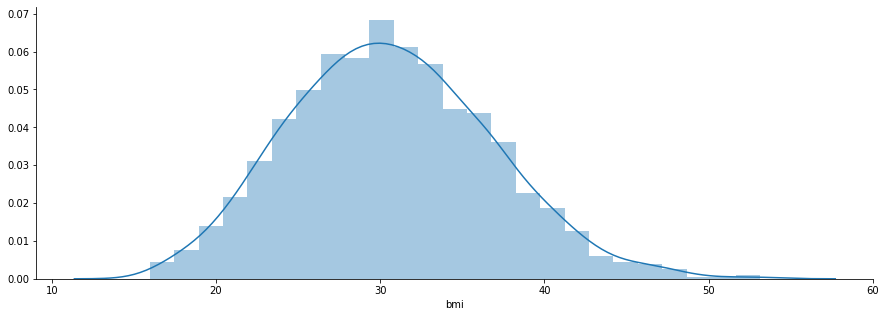

In [18]:
fig = plt.figure(figsize=(15,5))
sns.distplot(df['bmi'])
sns.despine()

###Bmi categorical

In [19]:
df['obes'].value_counts()

obese          705
overweith      386
normalweith    227
underweith      20
Name: obes, dtype: int64

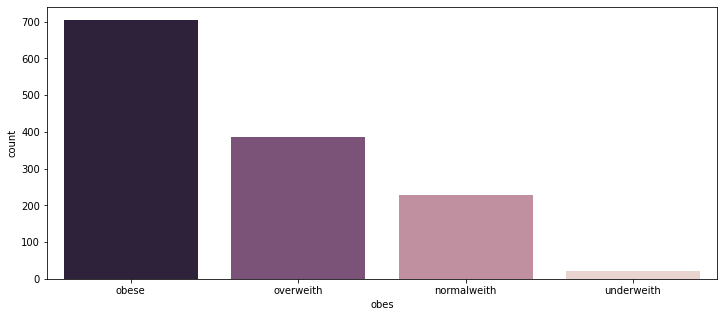

In [20]:
fig = plt.figure(figsize=(12,5))
sns.countplot(x='obes',order = df.obes.value_counts().index,data=df, palette=sns.cubehelix_palette(4, reverse=True));

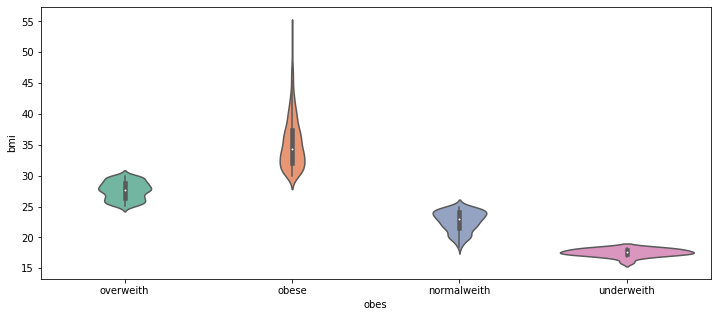

In [21]:
fig = plt.figure(figsize=(12,5))
sns.violinplot(y='bmi', x='obes',data=df, palette=sns.color_palette("Set2"));

###Region

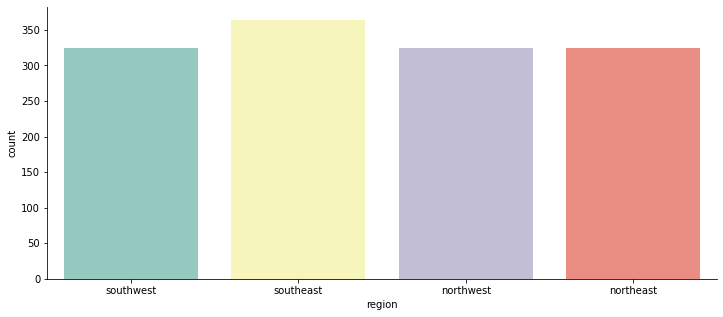

In [22]:
fig = plt.figure(figsize=(12,5))
sns.countplot(x='region', data=df, palette=sns.color_palette("Set3"))
sns.despine()

###Charges

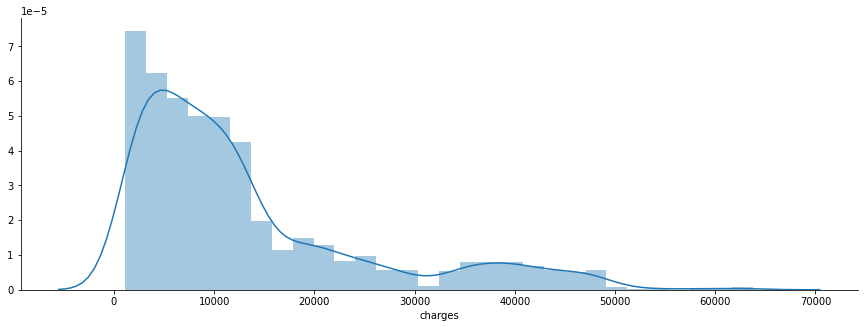

In [23]:
fig = plt.figure(figsize=(15,5))
sns.distplot(df['charges'])
sns.despine()

##Comparisons


###Sex and age

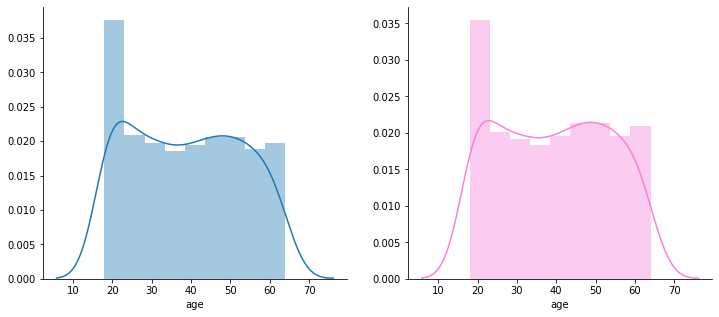

In [24]:
fig = plt.figure(figsize=(12,5))

ax = fig.add_subplot(121)
sns.distplot(df[df['sex']=='male']['age'])
sns.despine()
ax = fig.add_subplot(122)
sns.distplot(df[df['sex']=='female']['age'], color='#F781D8')
sns.despine()

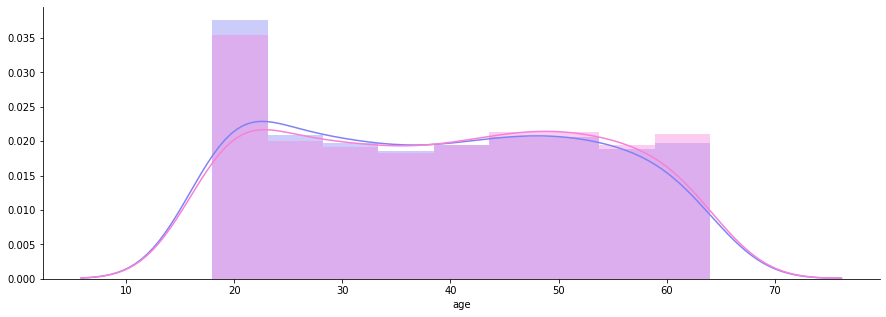

In [25]:
fig2 = plt.figure(figsize=(15,5))
sns.distplot(df[df['sex']=='male']['age'], color='#8181F7')
sns.distplot(df[df['sex']=='female']['age'], color='#F781D8')
sns.despine()

###Sex and bmi

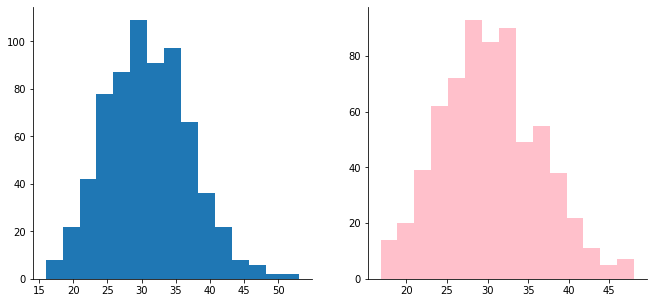

In [26]:
fig = plt.figure(figsize=(11,5))
ax = fig.add_subplot(121)
plt.hist(df[df['sex']=='male']['bmi'], bins=15)
sns.despine()
ax = fig.add_subplot(122)
plt.hist(df[df['sex']=='female']['bmi'], color='pink', bins=15)
sns.despine();

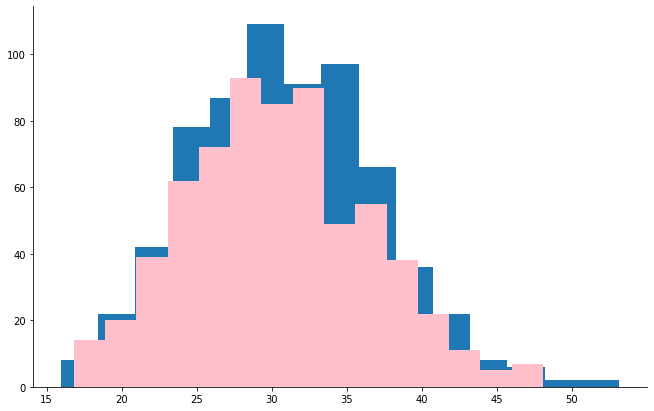

In [27]:
fig = plt.figure(figsize=(11,7))
plt.hist(df[df['sex']=='male']['bmi'], bins=15)
plt.hist(df[df['sex']=='female']['bmi'], color='pink', bins=15)
sns.despine();

### Sex and smoker

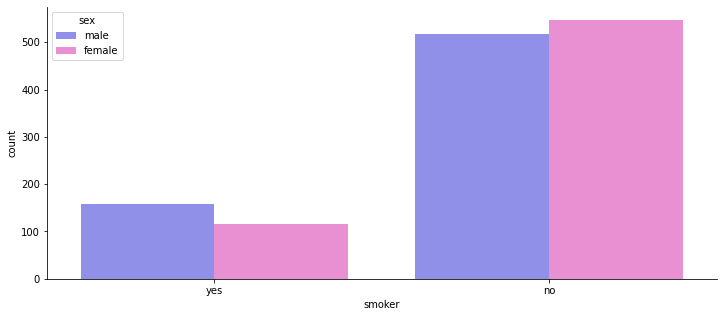

In [28]:
fig = plt.figure(figsize=(12,5))
sns.countplot(x='smoker', hue_order=df['sex'].value_counts().index, hue='sex',data=df, palette=paleta_genero)
sns.despine()

###Charges and age

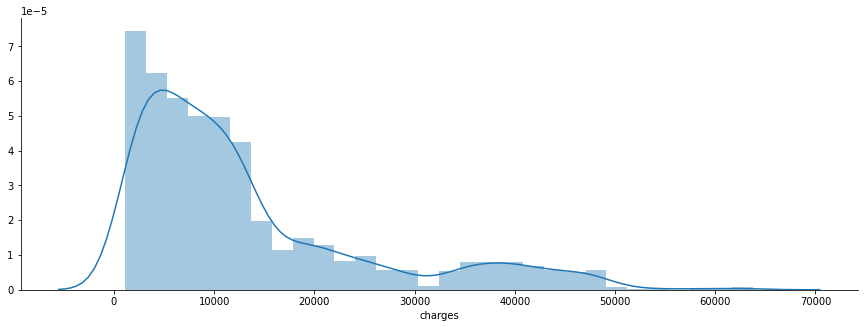

In [29]:
fig = plt.figure(figsize=(15,5))
sns.distplot(df['charges'])
sns.despine()

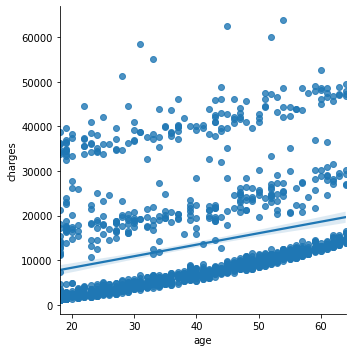

In [30]:
sns.lmplot('age', 'charges', data=df)
sns.despine()

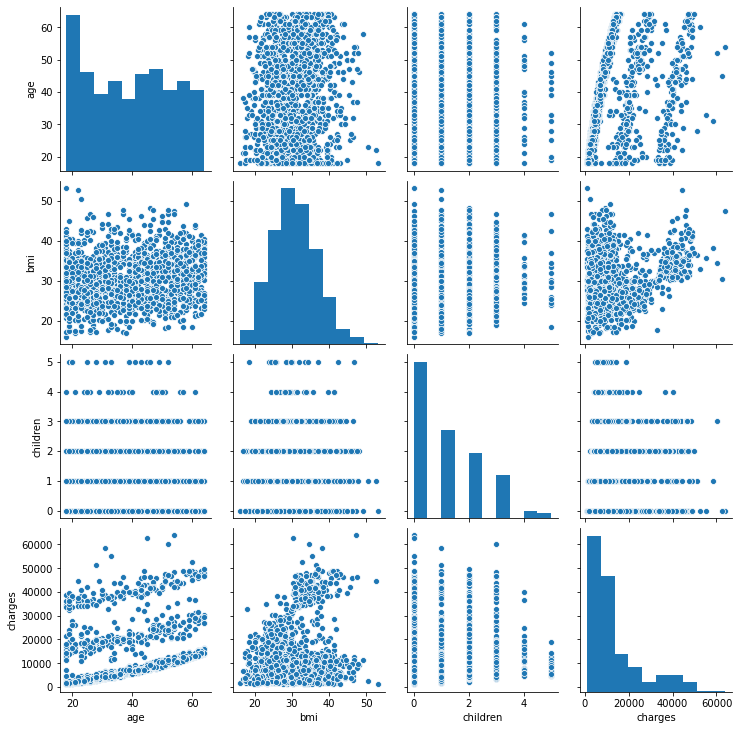

In [31]:
sns.pairplot(df);

### Smokers e charges

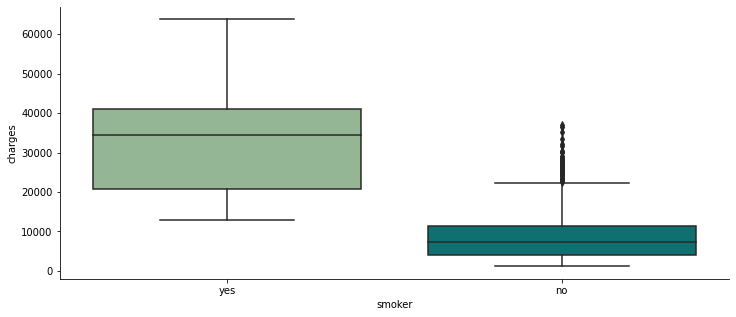

In [32]:
fig = plt.figure(figsize=(12,5))
sns.boxplot(x='smoker', y='charges', palette=paleta_fumante, data=df)
sns.despine()

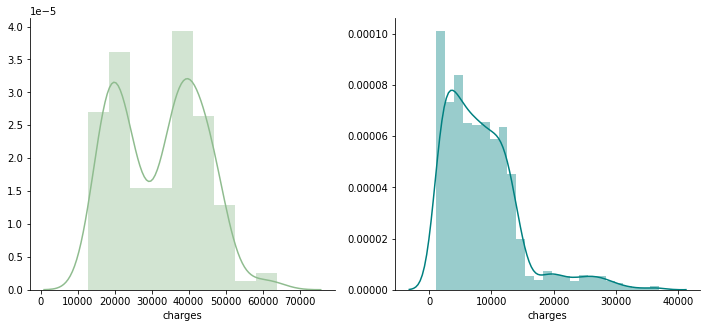

In [33]:
fig = plt.figure(figsize=(12,5))

ax = fig.add_subplot(121)
sns.distplot(df[df['smoker']=='yes']['charges'],color='#8FBC8F' , ax=ax)
sns.despine()
ax = fig.add_subplot(122)
sns.distplot(df[df['smoker']=='no']['charges'],color='#008080', ax=ax)
sns.despine();

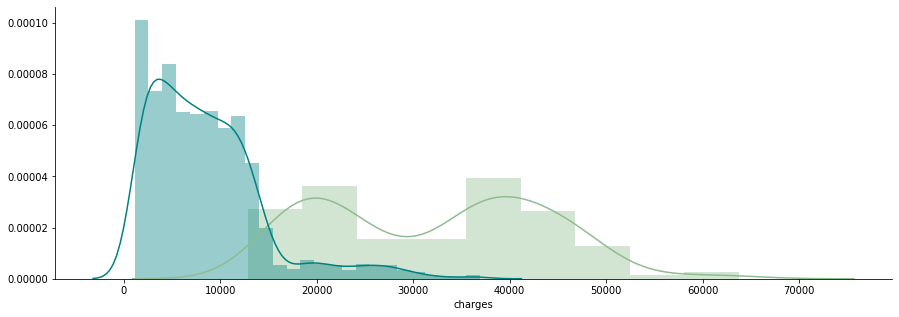

In [34]:
fig = plt.figure(figsize=(15,5))
sns.distplot(df[df['smoker']=='yes']['charges'], color= '#8FBC8F')
sns.distplot(df[df['smoker']=='no']['charges'], color= '#008080')
sns.despine()

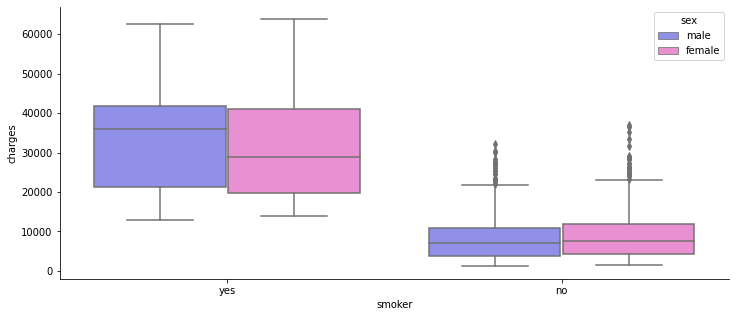

In [35]:
fig = plt.figure(figsize=(12,5))
sns.boxplot(x='smoker', y='charges',hue='sex',hue_order=df['sex'].value_counts().index, data=df, palette=paleta_genero)
sns.despine()

### Smokers and ages

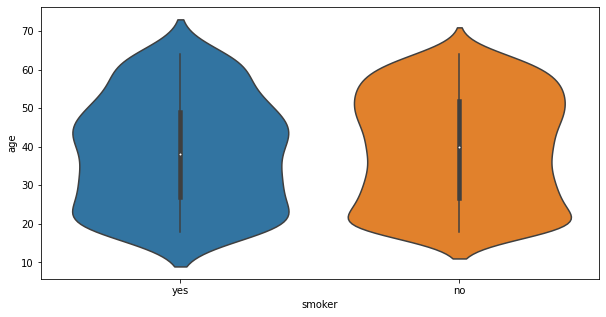

In [36]:
fig = plt.figure(figsize=(10,5))
sns.violinplot(x='smoker', y='age', data=df, pallete=paleta_fumante);

##More comparisons


### Age x charges x smoker

<Figure size 1080x360 with 0 Axes>

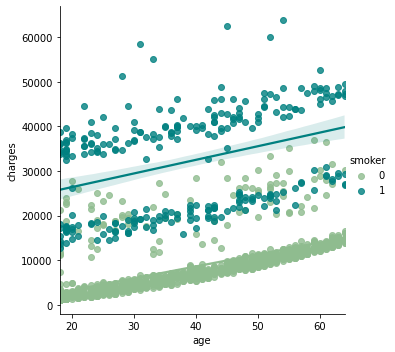

In [60]:
fig = plt.figure(figsize=(15,5))
sns.lmplot('age', 'charges',hue='smoker', data=df, palette=paleta_fumante)

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


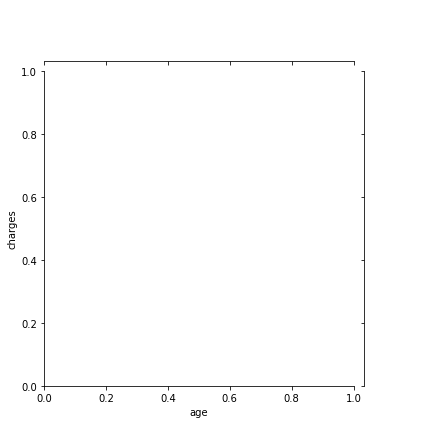

In [61]:
sns.jointplot(x="age", y="charges", data=df[df.smoker=='yes'],color='#F781D8', kind="kde");

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


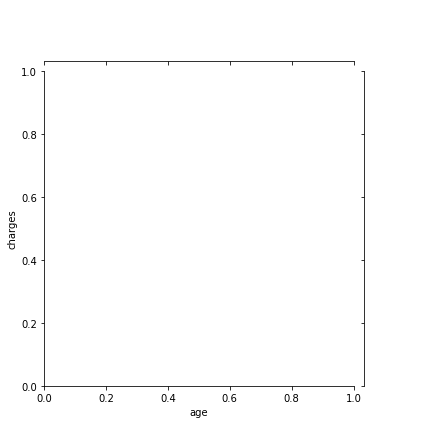

In [62]:
sns.jointplot(x="age", y="charges", data=df[df.smoker=='no'],color='#F781D8', kind="kde");

### Age x charges x obes

<Figure size 1080x360 with 0 Axes>

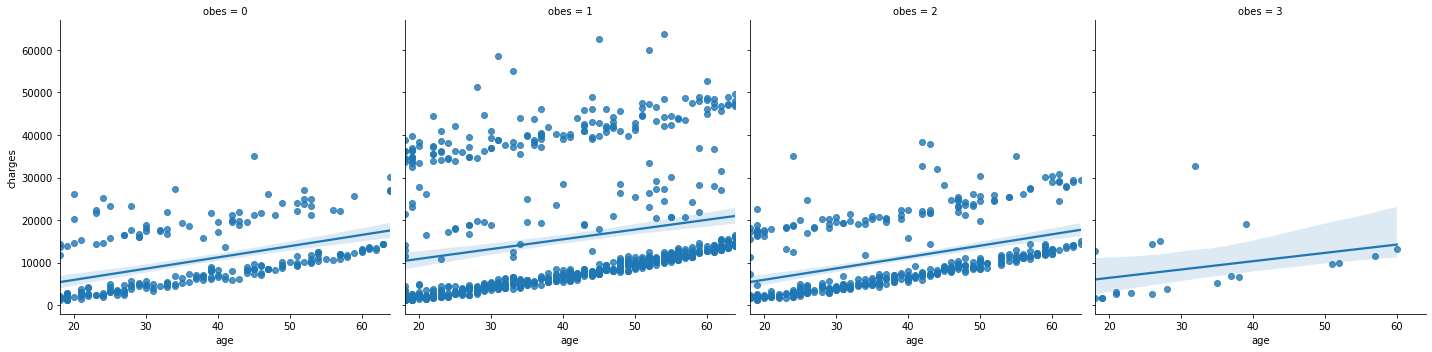

In [63]:
fig = plt.figure(figsize=(15,5))
sns.lmplot('age', 'charges', col='obes', data=df, palette=paleta_fumante)

### Age x charges x smoker x sex x obes

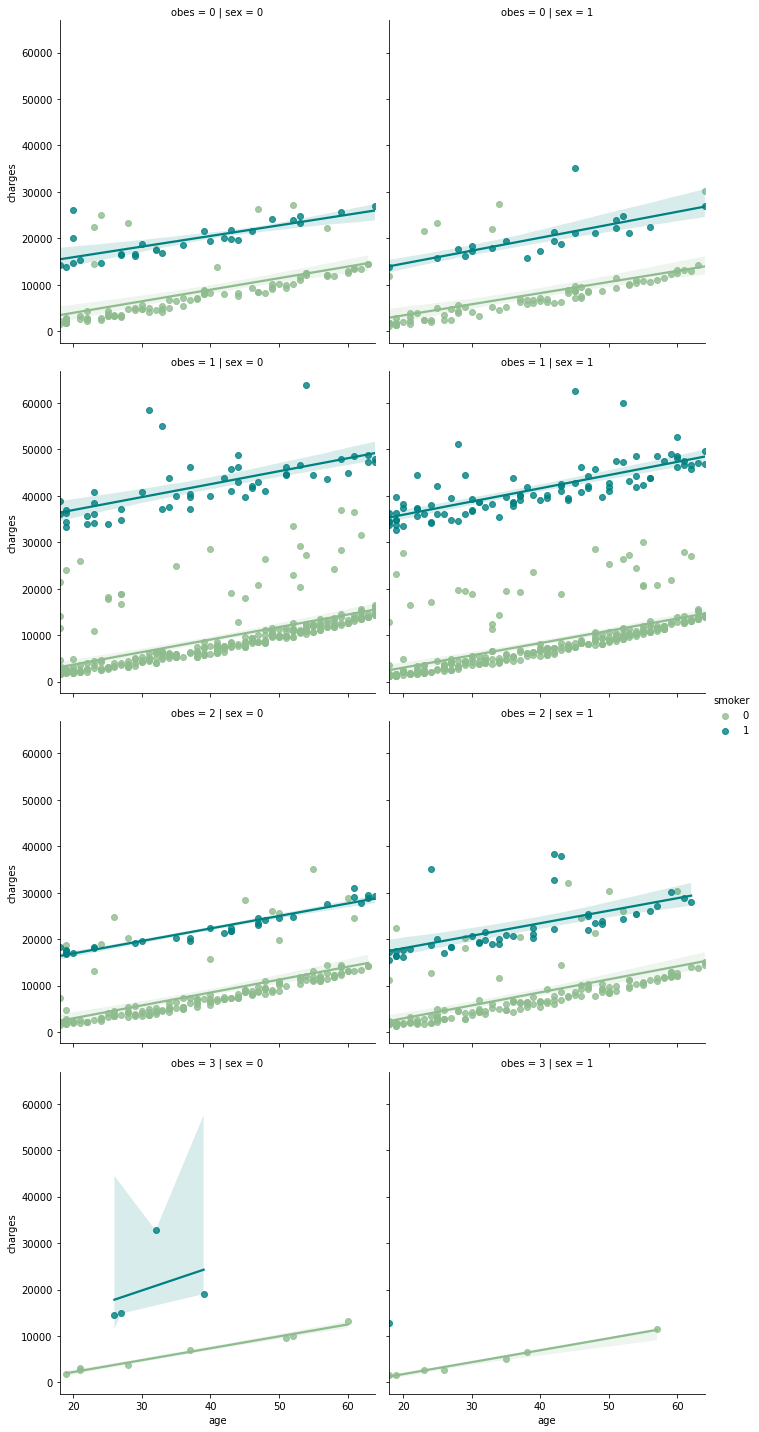

In [64]:
sns.lmplot('age', 'charges',hue='smoker',col='sex',row='obes', data=df, palette=paleta_fumante);

### Bmi x charges x obes

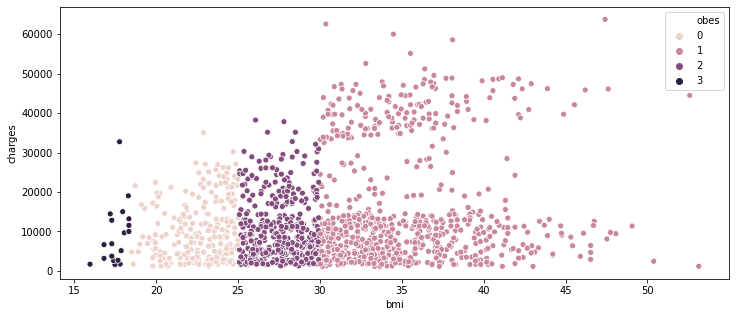

In [65]:
fig=plt.figure(figsize=(12,5))
sns.scatterplot(x="bmi", y="charges",hue= 'obes',data=df,palette=sns.cubehelix_palette(4));

### Bmi x charges x obes x sex

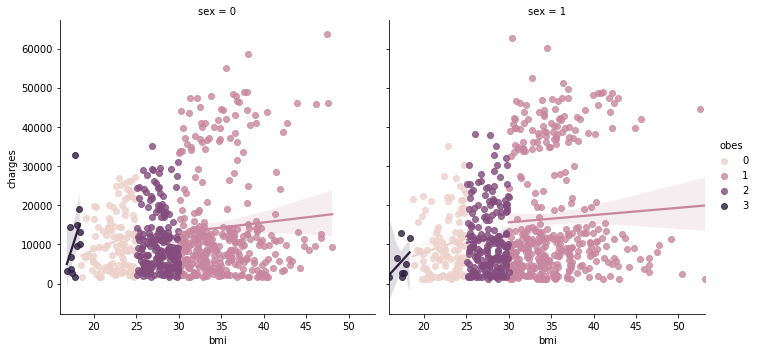

In [66]:
sns.lmplot(x="bmi", y="charges",hue= 'obes',col='sex', data=df,palette=sns.cubehelix_palette(4));

### Bmi x charges x obes x sex x smoker

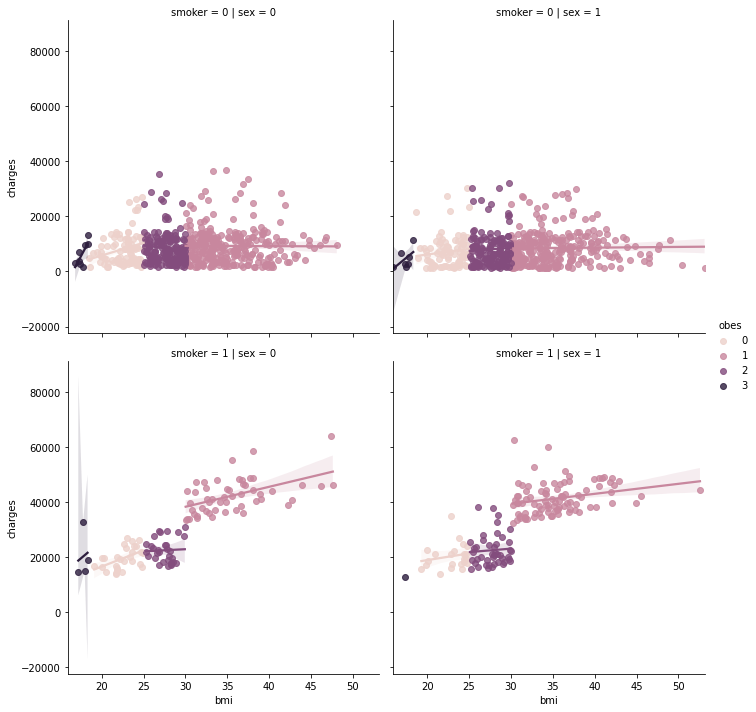

In [67]:
sns.lmplot(x="bmi", y="charges",hue= 'obes',col = 'sex', row='smoker', data=df,palette=sns.cubehelix_palette(4));

### Bmi x charges x smoker

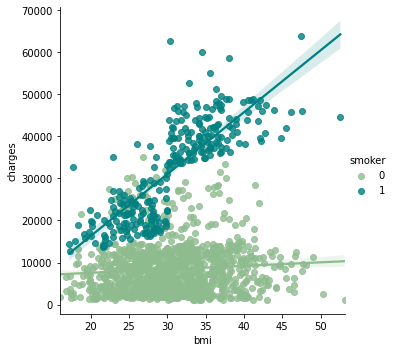

In [68]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=df, palette=paleta_fumante);

### Bmi x charges x sex

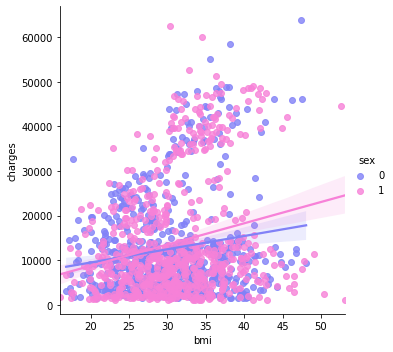

In [69]:
sns.lmplot(x="bmi", y="charges", hue="sex", data=df, palette=paleta_genero);

### Bmi x charges x sex x kids

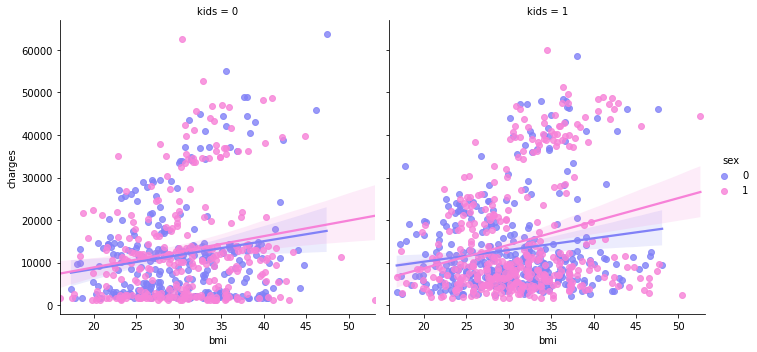

In [70]:
sns.lmplot(x="bmi", y="charges", hue="sex",col='kids' ,data=df, palette=paleta_genero);

### Bmi x charges x children

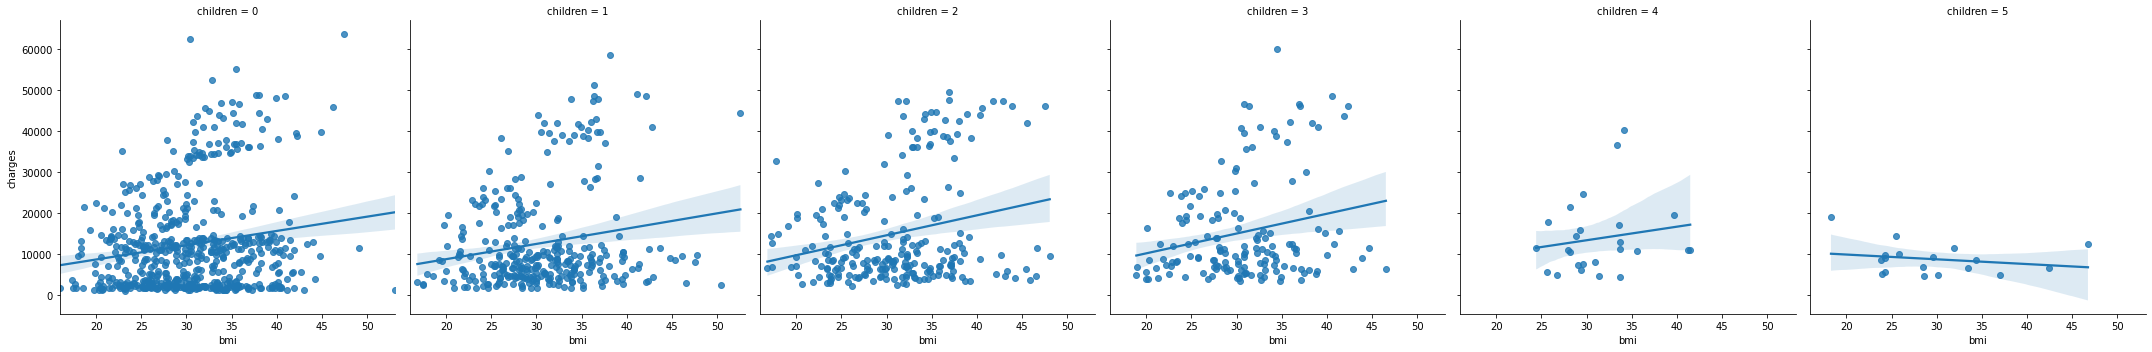

In [71]:
sns.lmplot('bmi', 'charges',col='children', data=df)

##Pre processing

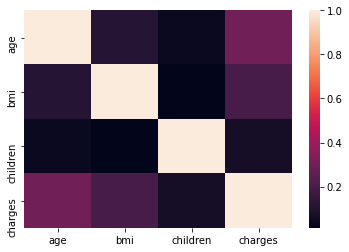

In [49]:
sns.heatmap(df.corr());

In [50]:
df.corr()['charges'].sort_values()

children    0.067998
bmi         0.198341
age         0.299008
charges     1.000000
Name: charges, dtype: float64

In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
le = LabelEncoder()
le.fit(df.smoker.drop_duplicates()) 
df.smoker = le.transform(df.smoker)

le.fit(df.sex.drop_duplicates())
df.sex = le.transform(df.sex)

le.fit(df.region.drop_duplicates()) 
df.region = le.transform(df.region)

le.fit(df.obes.drop_duplicates())
df.obes = le.transform(df.obes)

le.fit(df.kids.drop_duplicates())
df.kids = le.transform(df.kids)

In [53]:
from sklearn.model_selection import train_test_split
X = df.drop(['charges', 'region'],axis=1)
Y = df['charges']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

##Comparing models

###Linear Regression

It is used to estimate real values (cost of houses, numbers of colls, total sales, etc.) based on continuous variable(s).Here, we establish relationship between independent and dependent variables by fitting a best line. This best fit line is known as regression line and represented by a linear equation

linear.png

These coefficientes a and b are derived based on minimizing the sum of squared data points and regression line.Linear Regression is of mainly two types:

1. Simple Linear Regression
2. Multiple Linear Regression

Simple Linear Regression is characterized by one independet variable. And, Multiple Linear Regression (as the name suggest) is characterized by multiple (more than 1) independent variables.

The variable u, called the error term or disturbance in the relationship, represents factors other than x that affect y. A simple regression analysis effectively treats all factors affecting y other than x as being unobserved. You can usefully think of u as standing for “unobserved.”

**Python Code:**

```
#Import Libraries
from sklearn.linear_model import LinearRegression

#Create Linear Regression
linearmodel = LinearRegression()

#Fit Linear Regression
linear.fit(X_train, Y_train)

#Score (R²)
linear.score(X_train, Y_train)

#Equation coefficients and intercept
print(f'Cofficient: {linear.coef_'})print(f'Intercept: {linear.intercept_'})

#Predict 
output_predicted = linear.predict(x_test)
```

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

linear = LinearRegression()
linear.fit(X_train, Y_train)
linear.score(X_test, Y_test)

0.7990687615437146

In [55]:
linear_coefs = linear.coef_
linear_intercept = linear.intercept_
linear_intercept

-11580.319308718352

In [56]:
df_linear_coef = pd.DataFrame(linear_coefs, index=X.columns, columns=['Coefficients'])
df_linear_coef.T

,age,sex,bmi,children,smoker,obes,kids
Coefficients,254.715066,-25.844339,321.371225,266.1007,23571.234962,-373.271053,495.086346


###Polynomial Regression

---
In statistics, polynomial regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modelled as an nth degree polynomial in x.

In general, we can model the expected value of y as an nth degree polynomial, yielding the general polynomial regression model:


polynomial regression.png



```
#Import libraries
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

#Write de model
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())

#Train the model
polyreg.fit(X_train,Y_train)

#Score (R²)
polyreg.score(X_test, Y_test)
```





In [57]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree=3
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X_train,Y_train)

polyreg.score(X_test, Y_test)

0.8978235715343355

###Decision tree Regressor

---
Decision tree learning is one of the predictive modelling approaches used in statistics, data mining and machine learning. It uses a decision tree (as a predictive model) to go from observations about an item (represented in the branches) to conclusions about the item's target value (represented in the leaves). Tree models where the target variable can take a discrete set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. Decision trees are among the most popular machine learning algorithms given their intelligibility and simplicity

**Python code**


```
#Import libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

#Write the model
dt_regressor = DecisionTreeRegressor(random_state=0)

#Score
cross_val_score(dt_regressor,X_test, Y_test, cv=10).mean()```




In [58]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

dt_regressor = DecisionTreeRegressor(random_state=0)
dt_regressor.fit(X_train, Y_train)
cross_val_score(dt_regressor,X_test, Y_test, cv=10).mean()

0.7367028912234306

###Random Forest regressor

---
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees

**Python code**


```
#Import libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

#Write the model
randomF = RandomForestRegressor(n_estimators = 100, criterion = 'mse', random_state = 1, n_jobs = -1)

#Train the model
randomF.fit(X_train, Y_train)
randomF_train_pred = randomF.predict(X_train)
randomF_test_pred = randomF.predict(X_test)

#Score
r2_score(Y_test,randomF_test_pred)```




In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

randomF = RandomForestRegressor(n_estimators = 100, criterion = 'mse', random_state = 1, n_jobs = -1)
randomF.fit(X_train, Y_train)

randomF_train_pred = randomF.predict(X_train)
randomF_test_pred = randomF.predict(X_test)


r2_score(Y_test,randomF_test_pred)

0.8730428701329734

#Result


1.   Polynomial Regression (SCORE: **0.8978235718637472**)  ~ 0.90
1.   Random Forest Regressor (SCORE: **0.8732885285925158**)  ~ 0.87
2.   Linear Regression (SCORE: **0.7990687615437146**) ~ 0.80
2.   Decision Tree Regressor (SCORE:**0.7366794077671697**) ~ 0.74




# Extra

---
Analyzing data on spending in hospitals alerts us to the importance of health care. We can get some health tips from this exploratory data analysis:

**Do not smoke**

**Stay at the ideal weight**


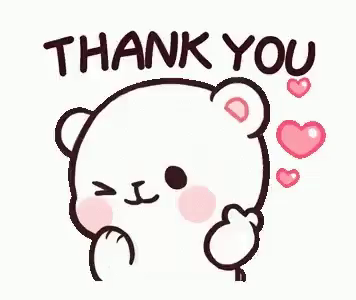